<center><h1>To Explore Unsupervised Machine Learning</h1></center>
<h3 style="text-align:right">~ B.Aakash</h3>

In [1]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# finding the no of unique columns in the Species
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


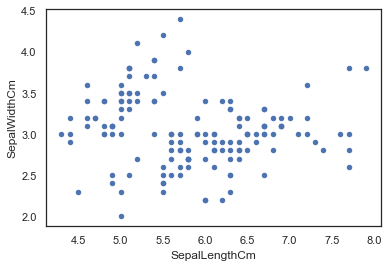

In [4]:
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

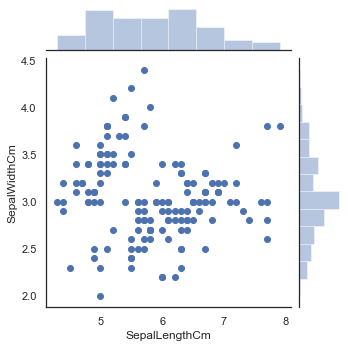

In [5]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data, size=5)

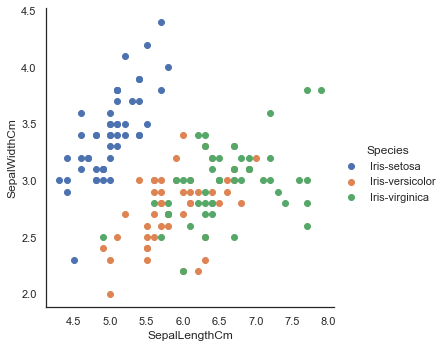

In [6]:
sns.FacetGrid(data, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

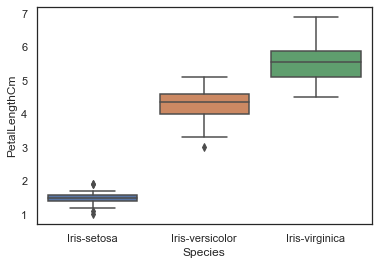

In [7]:
sns.boxplot(x="Species", y="PetalLengthCm", data=data)

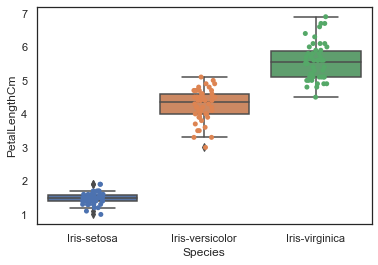

In [8]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=data)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=data, jitter=True, edgecolor="gray")

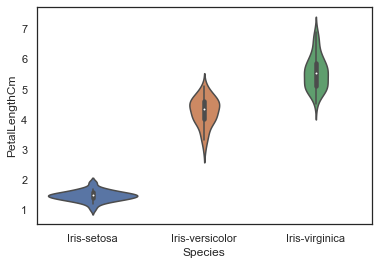

In [9]:
sns.violinplot(x="Species", y="PetalLengthCm", data=data, size=6)

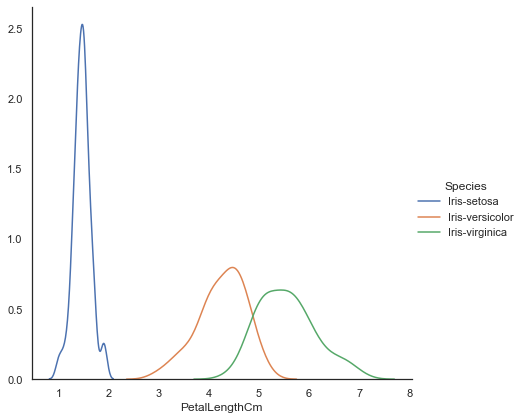

In [10]:
sns.FacetGrid(data, hue="Species", size=6).map(sns.kdeplot, "PetalLengthCm").add_legend()

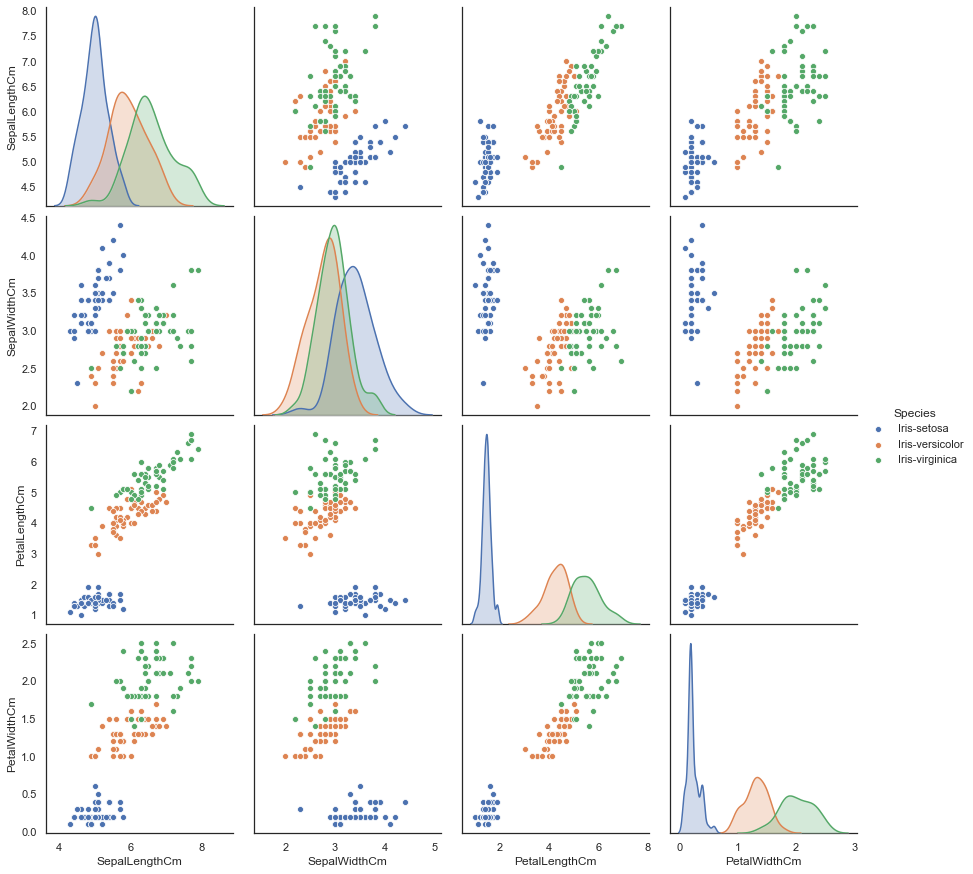

In [11]:
sns.pairplot(data.drop("Id", axis=1), hue="Species", size=3)

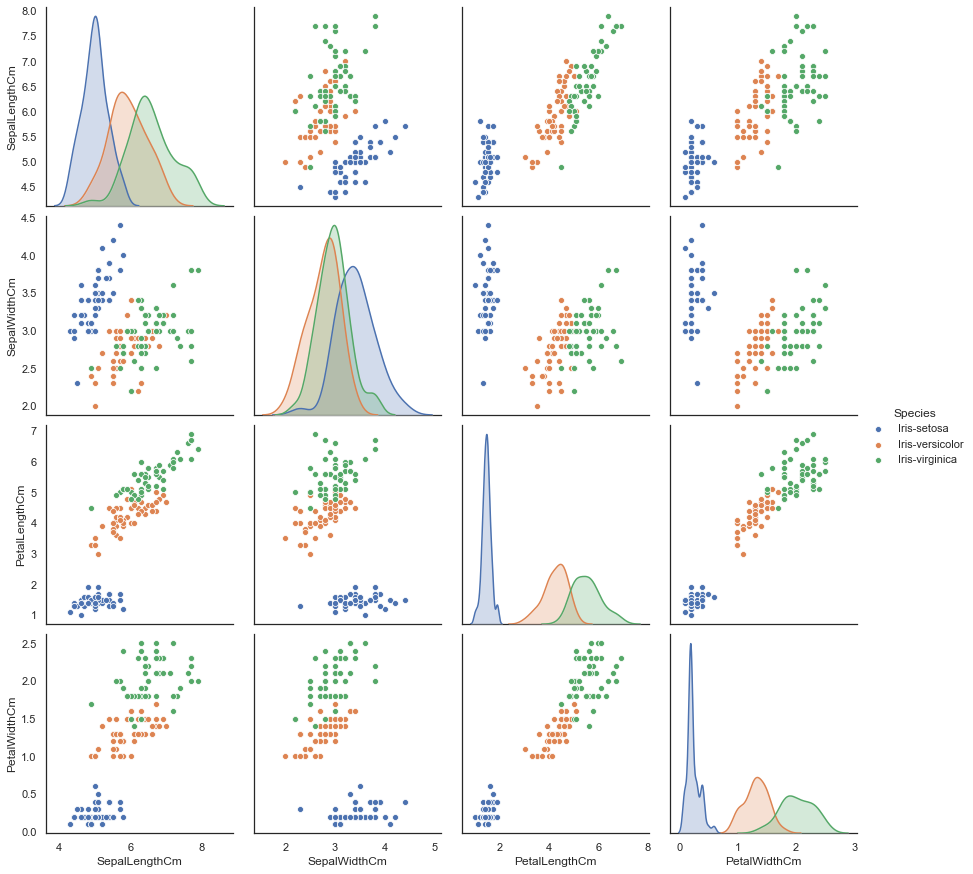

In [12]:
sns.pairplot(data.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

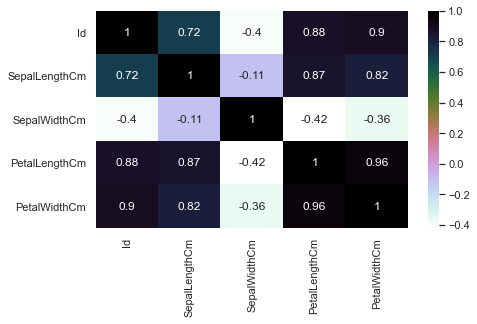

In [13]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

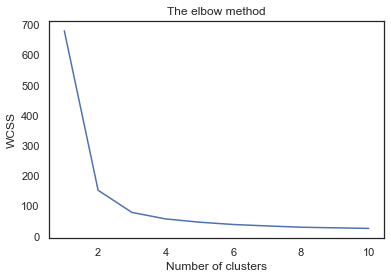

In [14]:
from sklearn.cluster import KMeans
wcss = []

x = data.iloc[:, [1, 2, 3, 4]].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

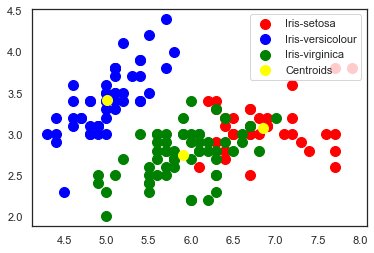

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroid')

plt.legend()

### Thanks for the watch